# 최근접 이웃(K-Nearest Neighbor)
- 특별한 예측 모델 없이 가장 가까운 데이터 포인터를 기반으로 예측을 수행하는 방법
- 분류와 회귀 모두 지원

In [6]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\2441446269.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [98]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline


## K 최근접 이웃 분류
- 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
- k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [4]:
iris = load_iris()

In [15]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
X, y = load_iris(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [18]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)


KNeighborsClassifier()

In [19]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.9666666666666667
평가 데이터 점수:1.0


In [21]:
model= KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [22]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.35
평가 데이터 점수:0.26666666666666666


In [25]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.9s finished


{'fit_time': array([0.        , 0.00143147, 0.        , 0.        , 0.00052619]),
 'score_time': array([0.00357795, 0.00214648, 0.0024364 , 0.00357795, 0.0024364 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [26]:
param_grid = [{'n_neighbors':[3,5,7],
'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [29]:
gs = GridSearchCV(
    estimator= KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs= multiprocessing.cpu_count(),
    verbose=True
)

In [30]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [31]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [32]:
print('GridSearchCV best score:{}'.format(gs.best_score_))

GridSearchCV best score:0.9800000000000001


In [61]:
# 시각화 정의 함수

def make_meshgrid(x,y,h= .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [53]:
tsne= TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [55]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,18.734144,-12.252456,0
1,16.083164,-13.096326,0
2,16.300772,-11.917230,0
3,15.824773,-12.290407,0
4,18.745003,-11.834414,0
...,...,...,...
145,-17.176611,0.943124,2
146,-14.184541,1.888458,2
147,-16.352482,1.371031,2
148,-17.264441,0.027825,2


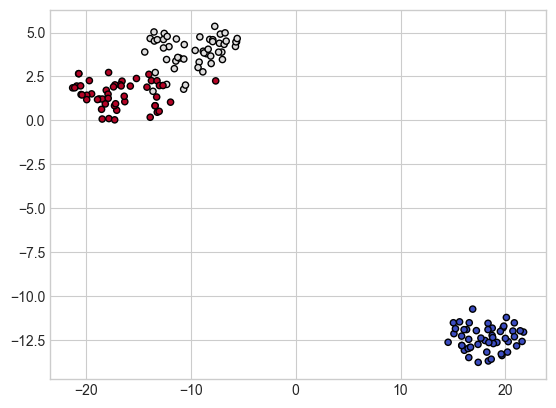

In [56]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


In [58]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict= model.predict(X_comp)

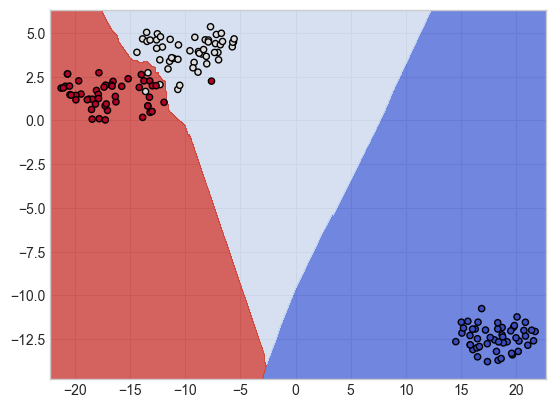

In [62]:
xx,yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 유방암 데이터

In [115]:
cancer = load_breast_cancer()

In [116]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [117]:
X,y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [118]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929,0
1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
2,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.15330,0.38420,0.35820,0.14070,0.3230,0.10330,1
3,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.11680,0.08465,0.1717,0.05054,...,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494,0
4,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.22,184.20,2403.0,0.12280,0.35830,0.39480,0.23460,0.3589,0.09187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
451,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,20.20,101.60,773.4,0.12640,0.15640,0.12060,0.08704,0.2806,0.07782,1
452,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865,0
453,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0


In [69]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,10.880,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,19.35,80.78,433.1,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800,1
1,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
2,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,24.39,73.07,390.2,0.13010,0.29500,0.34860,0.09910,0.2614,0.11620,1
3,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431,1
4,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,...,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,13.900,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,1
110,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
111,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1
112,12.890,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,19.69,92.12,595.6,0.09926,0.23170,0.33440,0.10170,0.1999,0.07127,1


In [119]:
scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [120]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.9494505494505494
평가 데이터 점수:0.9210526315789473


In [121]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [122]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [123]:
print("학습 데이터 점수:{}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수:0.9824175824175824
평가 데이터 점수:0.956140350877193


In [78]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [79]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs= multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.00249934, 0.00103879, 0.00104499, 0.00161433, 0.00100088]),
 'score_time': array([0.0702219 , 0.06984639, 0.06901979, 0.06295109, 0.06594968]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [80]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())]
)

In [84]:
param_grid = [{'model__n_neighbors':[3,5,7],
'model__weights':['uniform', 'distance'],
'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [85]:

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [86]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [87]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [88]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [89]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [93]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,-5.832767,-30.862297,0
1,-4.037468,-33.000835,0
2,-0.655264,-29.591150,0
3,-10.025201,21.923412,0
4,1.768011,-30.119476,0
...,...,...,...
564,-4.799218,-34.559586,0
565,-0.860727,-30.711100,0
566,13.883546,-17.659925,0
567,-2.471828,-31.376621,0


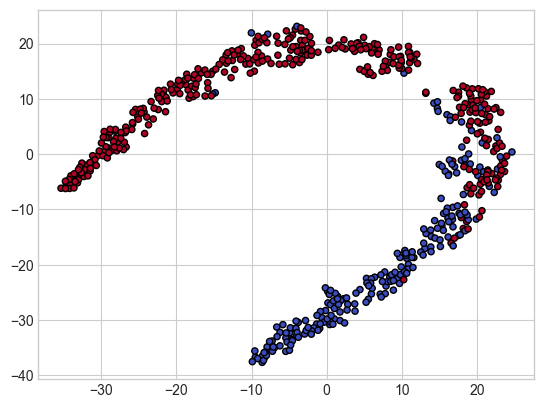

In [94]:
plt.scatter(X_comp[:, 0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [95]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

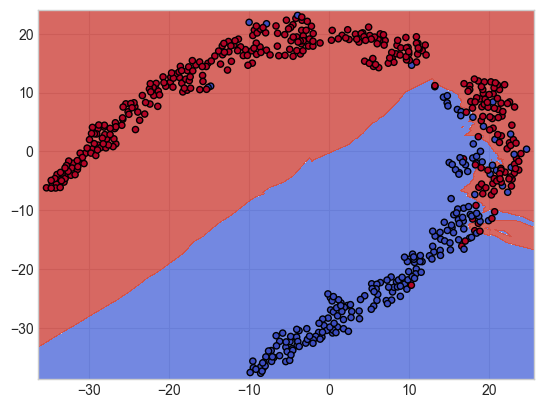

In [97]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 와인 데이터

In [124]:
wine = load_wine()

In [125]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['Target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [127]:
X,y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [128]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['Target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
1,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
2,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0
3,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
4,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,2
138,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
139,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
140,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0


In [129]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['Target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.910,3.00,1035.0,0
1,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.060,3.58,1295.0,0
2,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.910,2.05,550.0,2
3,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.890,2.15,590.0,2
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.960,3.36,845.0,0
5,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.750,1.27,720.0,2
6,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.660,1.83,510.0,2
7,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.800,3.38,438.0,1
8,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.250,3.40,915.0,0
9,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1


In [130]:
scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [131]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [132]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7887323943661971
평가 데이터 점수:0.6388888888888888


In [133]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [134]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [135]:
print("학습 데이터 점수:{}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수:0.9788732394366197
평가 데이터 점수:0.9722222222222222


In [136]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [137]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs= multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.6s finished


{'fit_time': array([0.0010004 , 0.0010004 , 0.00200081, 0.00078988, 0.00252342]),
 'score_time': array([0.00200057, 0.00099874, 0.00199914, 0.00352359, 0.0033145 ]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [138]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())]
)

In [139]:
param_grid = [{'model__n_neighbors':[3,5,7],
'model__weights':['uniform', 'distance'],
'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [140]:

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [141]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [142]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [143]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [144]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [145]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,-6.238696,-7.495006,0
1,-6.069503,-7.181577,0
2,-7.920739,-8.889237,0
3,-9.789796,-10.970486,0
4,-0.919195,-0.731649,0
...,...,...,...
173,-0.596274,-1.000954,2
174,-0.923194,-1.282375,2
175,-2.797644,-3.088265,2
176,-3.021981,-3.104625,2


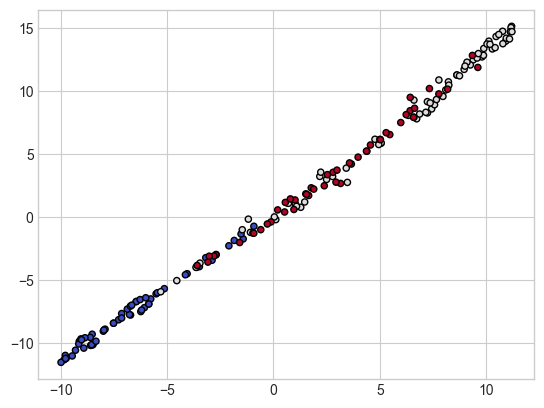

In [146]:
plt.scatter(X_comp[:, 0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [147]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

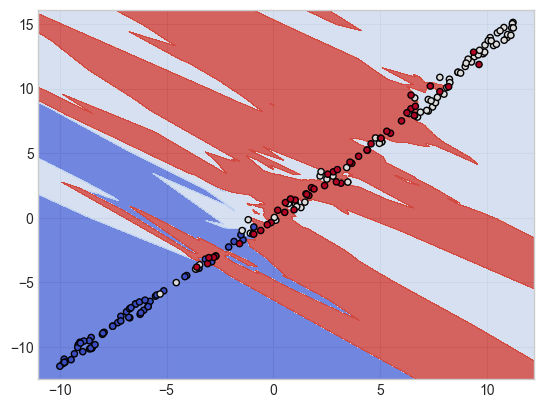

In [149]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## k 최근접 이웃 회귀
- k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
- 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [220]:
boston = load_boston()

c:\anaconda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [221]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['Target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [222]:
X,y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [223]:
boston_train_df = pd.DataFrame(data=X_train, columns= boston.feature_names)
boston_train_df['Target'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
1,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6
2,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
3,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62,10.2
4,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14,23.8
400,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
401,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98,32.0
402,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2


In [224]:
boston_test_df = pd.DataFrame(data=X_test, columns= boston.feature_names)
boston_test_df['Target'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
1,2.44953,0.0,19.58,0.0,0.605,6.402,95.2,2.2625,5.0,403.0,14.7,330.04,11.32,22.3
2,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
3,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6
4,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74,23.7
98,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.1
99,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
100,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10,20.3


In [225]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [226]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [227]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7039555283679122
평가 데이터 점수:0.6367565740256339


In [228]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [229]:
print("학습 데이터 점수:{}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수:0.8478273846396606
평가 데이터 점수:0.815871711979204


In [230]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs= multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00199485, 0.00200009, 0.00200009, 0.00227928, 0.00277758]),
 'score_time': array([0.00227928, 0.00177741, 0.00177741, 0.00150204, 0.00100374]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [232]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())]
)

In [233]:
param_grid = [{'model__n_neighbors':[3,5,7],
'model__weights':['uniform', 'distance'],
'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [234]:

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [235]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [236]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [237]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [238]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [239]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,4.133058,24.0
1,-16.287340,21.6
2,-12.549524,34.7
3,-13.490840,33.4
4,-13.756586,36.2
...,...,...
501,1.134630,22.4
502,0.488049,20.6
503,-0.275494,23.9
504,-0.233291,22.0


C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\1638329518.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


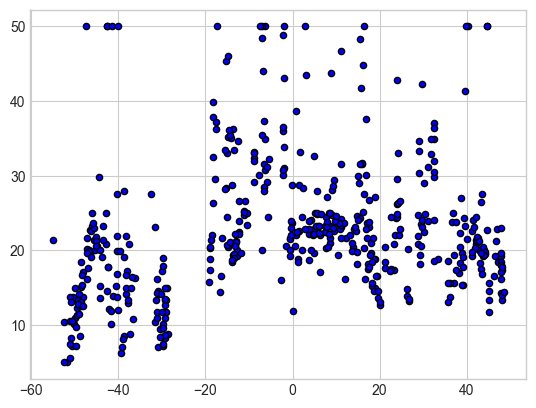

In [240]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [241]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\151620241.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\151620241.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


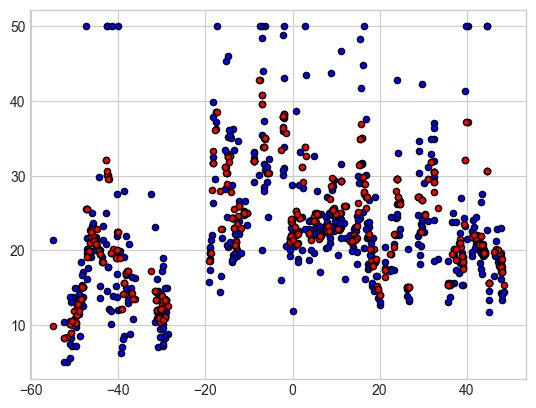

In [242]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 캘리포니아 주택 가격 데이터

In [193]:
california = fetch_california_housing()

In [194]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [195]:
X,y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [196]:
california_train_df = pd.DataFrame(data=X_train, columns= california.feature_names)
california_train_df['Target'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.8312,16.0,4.516051,1.266808,5105.0,1.546033,34.19,-118.60,2.13900
1,4.9550,4.0,5.390459,1.098940,3775.0,2.223204,33.00,-117.07,2.41500
2,3.2708,43.0,5.330409,1.046784,1065.0,3.114035,33.95,-118.31,1.31000
3,1.4427,43.0,4.520513,0.997436,1623.0,4.161538,36.72,-119.77,0.47700
4,8.7580,30.0,7.338129,1.057554,787.0,2.830935,37.35,-122.06,5.00001
...,...,...,...,...,...,...,...,...,...
16507,4.5795,28.0,6.025391,1.078125,1277.0,2.494141,37.31,-121.88,2.62800
16508,1.6148,16.0,4.365662,1.099607,1955.0,2.562254,36.32,-119.33,0.86600
16509,6.2781,17.0,6.787798,0.981432,1238.0,3.283820,37.75,-121.94,2.69800
16510,4.0417,23.0,10.639456,2.027211,339.0,2.306122,38.94,-119.98,0.99300


In [197]:
california_test_df = pd.DataFrame(data=X_test, columns= california.feature_names)
california_test_df['Target'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,3.2633,21.0,5.265271,1.051483,3795.0,3.311518,32.61,-117.05,1.297
1,7.0242,18.0,6.935728,0.964083,3419.0,3.231569,34.18,-118.97,2.931
2,4.8083,5.0,6.914343,1.055777,1541.0,3.069721,33.52,-117.05,3.477
3,1.5479,31.0,4.147854,1.025437,1796.0,2.855326,37.06,-120.85,0.820
4,4.4831,36.0,5.256098,0.981707,838.0,2.554878,33.80,-118.09,2.539
...,...,...,...,...,...,...,...,...,...
4123,3.7835,52.0,5.424157,1.005618,1092.0,3.067416,37.73,-122.41,2.713
4124,4.3321,19.0,6.525773,1.038292,1764.0,2.597938,36.98,-121.83,2.986
4125,4.7500,37.0,5.150485,0.980583,768.0,3.728155,33.90,-118.10,1.619
4126,3.5568,33.0,4.858621,1.058621,633.0,2.182759,36.60,-121.86,1.912


In [198]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [199]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [200]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.4456799724482652
평가 데이터 점수:0.15726647601732313


In [201]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [202]:
print("학습 데이터 점수:{}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수:0.7888433981866464
평가 데이터 점수:0.6965962611183465


In [203]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs= multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.6s finished


{'fit_time': array([0.04370141, 0.04470134, 0.04008794, 0.04843378, 0.04622269]),
 'score_time': array([0.38613677, 0.31927299, 0.32976437, 0.42690229, 0.36229992]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [204]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())]
)

In [205]:
param_grid = [{'model__n_neighbors':[3,5,7],
'model__weights':['uniform', 'distance'],
'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [ ]:

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [206]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [207]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [208]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [210]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [211]:
california_comp_df = pd.DataFrame(data=X_comp)
california_comp_df['Target'] = y
california_comp_df

,0,Target
0,-71.632782,4.526
1,68.640656,3.585
2,-69.730583,3.521
3,-55.289806,3.413
4,-54.787056,3.422
...,...,...
20635,49.149437,0.781
20636,-56.474201,0.771
20637,79.937401,0.923
20638,-10.014927,0.847


C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\1638329518.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


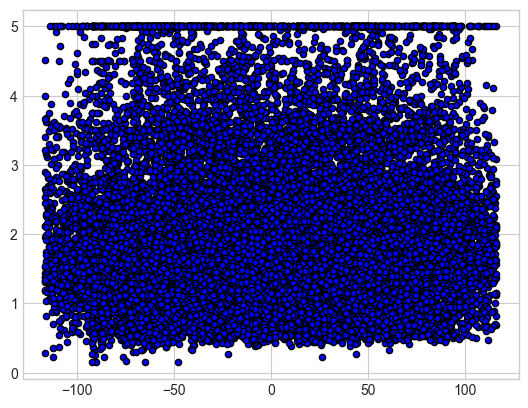

In [212]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [214]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\151620241.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
C:\Users\seoyj\AppData\Local\Temp\ipykernel_14224\151620241.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


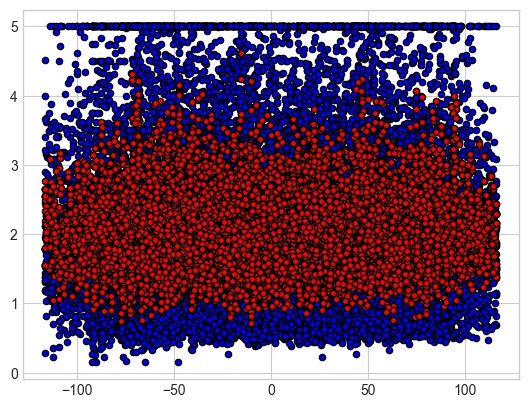

In [215]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');